In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from basketball_reference_web_scraper import client
import numpy as np
%matplotlib inline

In [4]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import teamyearbyyearstats, leaguestandings, leaguegamefinder
from nba_api.stats.library.parameters import Season, SeasonType

In [6]:
nba_teams = teams.get_teams()
team_dict = {}
abbrevs = {}
for team in nba_teams:
    name = team['nickname'].split()[-1].upper()
    if name == '76ERS':
        name = 'SIXERS'

    team_dict[name] = team['id']
    abbrevs[team['abbreviation']] = name
team_dict

{'HAWKS': 1610612737,
 'CELTICS': 1610612738,
 'CAVALIERS': 1610612739,
 'PELICANS': 1610612740,
 'BULLS': 1610612741,
 'MAVERICKS': 1610612742,
 'NUGGETS': 1610612743,
 'WARRIORS': 1610612744,
 'ROCKETS': 1610612745,
 'CLIPPERS': 1610612746,
 'LAKERS': 1610612747,
 'HEAT': 1610612748,
 'BUCKS': 1610612749,
 'TIMBERWOLVES': 1610612750,
 'NETS': 1610612751,
 'KNICKS': 1610612752,
 'MAGIC': 1610612753,
 'PACERS': 1610612754,
 'SIXERS': 1610612755,
 'SUNS': 1610612756,
 'BLAZERS': 1610612757,
 'KINGS': 1610612758,
 'SPURS': 1610612759,
 'THUNDER': 1610612760,
 'RAPTORS': 1610612761,
 'JAZZ': 1610612762,
 'GRIZZLIES': 1610612763,
 'WIZARDS': 1610612764,
 'PISTONS': 1610612765,
 'HORNETS': 1610612766}

In [8]:
dir(teamyearbyyearstats)

['Endpoint',
 'LeagueID',
 'NBAStatsHTTP',
 'PerModeSimple',
 'SeasonTypeAllStar',
 'TeamYearByYearStats',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

In [51]:
magic = teamyearbyyearstats.TeamYearByYearStats(team_id=team_dict['MAGIC']).get_dict()
magic['resultSets'][0]
magic_df = pd.DataFrame(columns = magic['resultSets'][0]['headers'])
headers = magic['resultSets'][0]['headers']
for row in magic['resultSets'][0]['rowSet']:
    magic_df = magic_df.append(pd.Series(row, index=magic['resultSets'][0]['headers']), ignore_index=True)
magic_df = magic_df.iloc[-9:]
magic_df["PPG"] = magic_df["PTS"]/magic_df["GP"]

In [57]:
magic_df.columns

Index(['TEAM_ID', 'TEAM_CITY', 'TEAM_NAME', 'YEAR', 'GP', 'WINS', 'LOSSES',
       'WIN_PCT', 'CONF_RANK', 'DIV_RANK', 'PO_WINS', 'PO_LOSSES',
       'CONF_COUNT', 'DIV_COUNT', 'NBA_FINALS_APPEARANCE', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'PF', 'STL', 'TOV', 'BLK', 'PTS', 'PTS_RANK',
       'PPG'],
      dtype='object')

In [53]:
league_points = []
for team in team_dict.keys():
    nbateam = teamyearbyyearstats.TeamYearByYearStats(team_id=team_dict[team]).get_dict()
    df = pd.DataFrame(columns = nbateam['resultSets'][0]['headers'])
    for row in nbateam['resultSets'][0]['rowSet']:
        df = df.append(pd.Series(row, index=nbateam['resultSets'][0]['headers']), ignore_index=True)
    
    df = df.iloc[-9:]
    df['PPG'] = df["PTS"]/df["GP"]
    league_points.append(list(df['PPG']))

[[96.5909090909091,
  97.95121951219512,
  101.0,
  102.54878048780488,
  102.84146341463415,
  103.15853658536585,
  103.35365853658537,
  113.34146341463415,
  111.76119402985074],
 [91.84848484848484,
  96.51851851851852,
  96.2439024390244,
  101.36585365853658,
  105.71951219512195,
  108.01219512195122,
  104.01219512195122,
  112.39024390243902,
  113.65277777777777],
 [93.03030303030303,
  96.5,
  98.21951219512195,
  103.13414634146342,
  104.32926829268293,
  110.34146341463415,
  110.86585365853658,
  104.47560975609755,
  106.8923076923077],
 [89.63636363636364,
  94.07317073170732,
  99.71951219512195,
  99.35365853658537,
  102.71951219512195,
  104.34146341463415,
  111.71951219512195,
  115.4390243902439,
  115.84722222222223],
 [96.34848484848484,
  93.1829268292683,
  93.65853658536585,
  100.79268292682927,
  101.64634146341463,
  102.86585365853658,
  102.92682926829268,
  104.9390243902439,
  106.84615384615384],
 [95.78787878787878,
  101.13414634146342,
  104.841

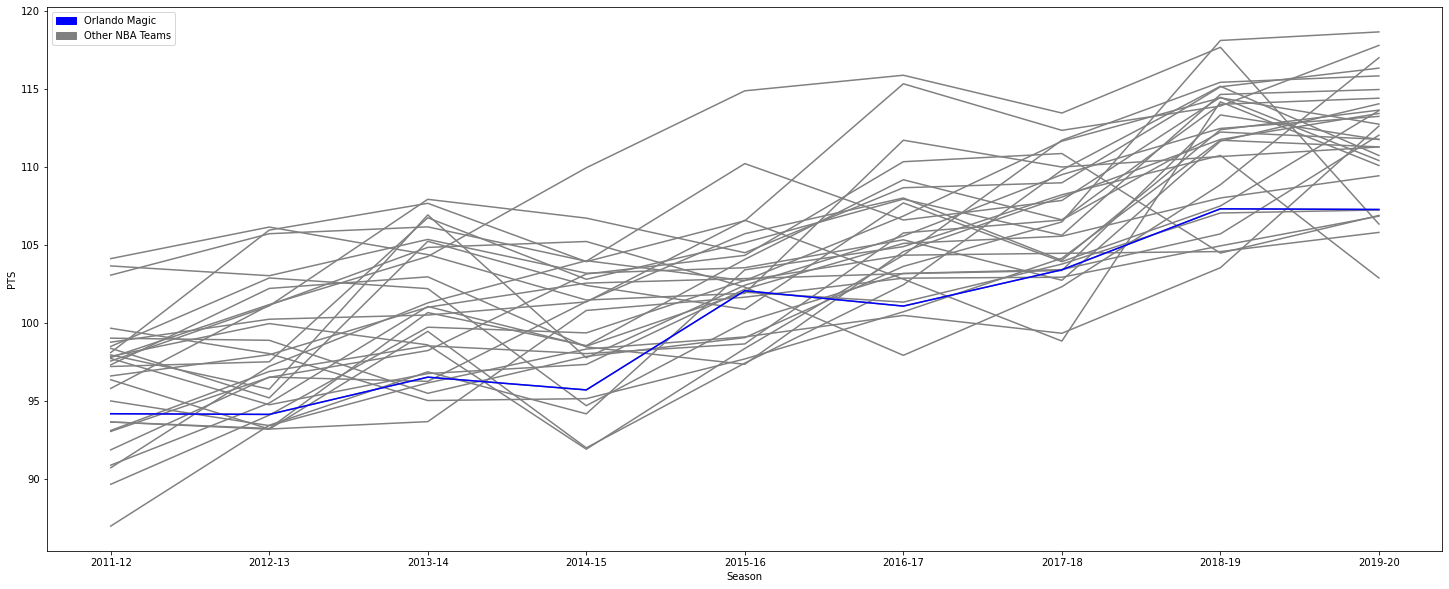

In [56]:
plt.rcParams['figure.figsize'] = [25, 10]
years = ['2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17','2017-18','2018-19', '2019-20']
for lst in league_points:
    plt.plot(years, lst, color='gray')
plt.plot(years, list(magic_df['PPG']), color='blue')
plt.xlabel('Season')
plt.ylabel("PTS")
blue_patch = mpatches.Patch(color='blue', label='Orlando Magic')
gray_patch = mpatches.Patch(color='gray', label='Other NBA Teams')
plt.legend(handles=[blue_patch, gray_patch])
plt.show()

In [58]:
############### TOWNS VS DAVIS COMP #################

In [63]:
advanced_lst = {}
for i in range(2013, 2021):
    advanced_lst[i] = client.players_advanced_season_totals(season_end_year=i)

In [65]:
davis_stats = {}
for i in range(2013, 2018):
    davis_stats[i] = list(filter(lambda person: person['name'] == 'Anthony Davis', advanced_lst[i]))[0]
davis_stats

{2013: {'slug': 'davisan02',
  'name': 'Anthony Davis',
  'positions': [<Position.POWER_FORWARD: 'POWER FORWARD'>],
  'age': 19,
  'team': <Team.NEW_ORLEANS_HORNETS: 'NEW ORLEANS HORNETS'>,
  'games_played': 64,
  'minutes_played': 1846,
  'player_efficiency_rating': 21.7,
  'true_shooting_percentage': 0.559,
  'three_point_attempt_rate': 0.009,
  'free_throw_attempt_rate': 0.333,
  'offensive_rebound_percentage': 10.5,
  'defensive_rebound_percentage': 23.5,
  'total_rebound_percentage': 16.8,
  'assist_percentage': 6.1,
  'steal_percentage': 2.2,
  'block_percentage': 5.1,
  'turnover_percentage': 10.3,
  'usage_percentage': 21.8,
  'offensive_win_shares': 3.7,
  'defensive_win_shares': 2.4,
  'win_shares': 6.1,
  'win_shares_per_48_minutes': 0.159,
  'offensive_box_plus_minus': 1.8,
  'defensive_box_plus_minus': 0.7,
  'box_plus_minus': 2.5,
  'value_over_replacement_player': 2.1},
 2014: {'slug': 'davisan02',
  'name': 'Anthony Davis',
  'positions': [<Position.POWER_FORWARD: 'POWE

In [66]:
towns_stats = {}
for i in range(2016, 2021):
    towns_stats[i] = list(filter(lambda person: person['name'] == 'Karl-Anthony Towns', advanced_lst[i]))[0]
towns_stats

{2016: {'slug': 'townska01',
  'name': 'Karl-Anthony Towns',
  'positions': [<Position.CENTER: 'CENTER'>],
  'age': 20,
  'team': <Team.MINNESOTA_TIMBERWOLVES: 'MINNESOTA TIMBERWOLVES'>,
  'games_played': 82,
  'minutes_played': 2627,
  'player_efficiency_rating': 22.5,
  'true_shooting_percentage': 0.59,
  'three_point_attempt_rate': 0.076,
  'free_throw_attempt_rate': 0.239,
  'offensive_rebound_percentage': 10.3,
  'defensive_rebound_percentage': 27.5,
  'total_rebound_percentage': 19.0,
  'assist_percentage': 11.3,
  'steal_percentage': 1.1,
  'block_percentage': 4.3,
  'turnover_percentage': 12.6,
  'usage_percentage': 24.9,
  'offensive_win_shares': 5.5,
  'defensive_win_shares': 2.8,
  'win_shares': 8.3,
  'win_shares_per_48_minutes': 0.151,
  'offensive_box_plus_minus': 2.5,
  'defensive_box_plus_minus': -0.4,
  'box_plus_minus': 2.2,
  'value_over_replacement_player': 2.7},
 2017: {'slug': 'townska01',
  'name': 'Karl-Anthony Towns',
  'positions': [<Position.CENTER: 'CENTER'>

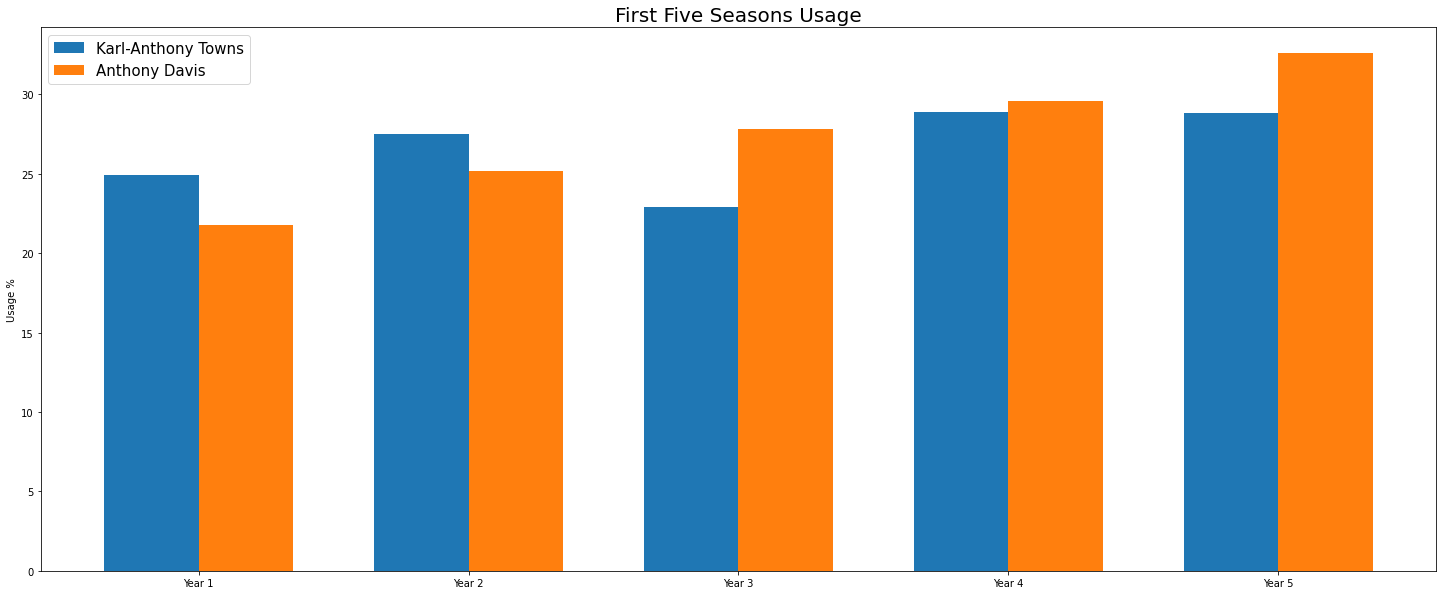

In [77]:
N = 5
kat_data = (towns_stats[2016]['usage_percentage'], towns_stats[2017]['usage_percentage'], towns_stats[2018]['usage_percentage'], towns_stats[2019]['usage_percentage'],  towns_stats[2020]['usage_percentage'])
ad_data = (davis_stats[2013]['usage_percentage'], davis_stats[2014]['usage_percentage'], davis_stats[2015]['usage_percentage'], davis_stats[2016]['usage_percentage'],  davis_stats[2017]['usage_percentage'])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, kat_data, width, label='Karl-Anthony Towns')
plt.bar(ind + width, ad_data, width, label='Anthony Davis')

plt.ylabel("Usage %")
plt.title('First Five Seasons Usage', fontsize=20)

plt.xticks(ind + width / 2, ('Year 1', 'Year 2', 'Year 3', 'Year 4','Year 5'))
plt.legend(loc='best', prop={'size': 15})

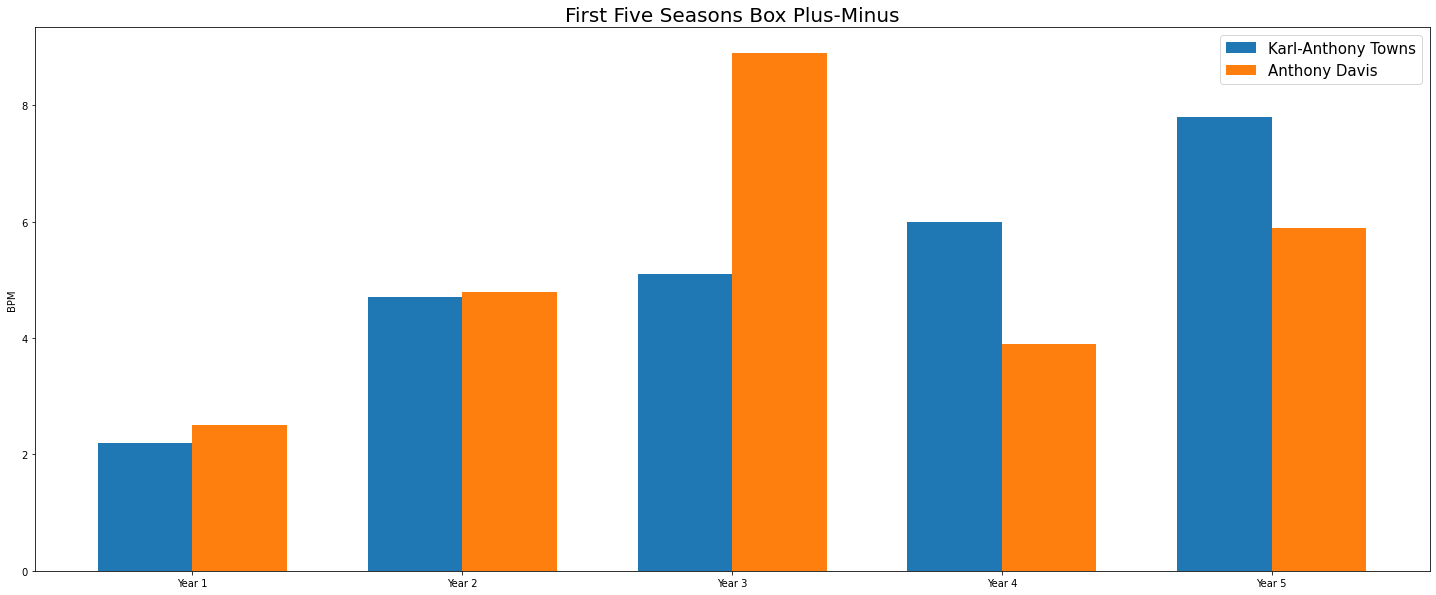

In [78]:
N = 5
kat_data = (towns_stats[2016]['box_plus_minus'], towns_stats[2017]['box_plus_minus'], towns_stats[2018]['box_plus_minus'], towns_stats[2019]['box_plus_minus'],  towns_stats[2020]['box_plus_minus'])
ad_data = (davis_stats[2013]['box_plus_minus'], davis_stats[2014]['box_plus_minus'], davis_stats[2015]['box_plus_minus'], davis_stats[2016]['box_plus_minus'],  davis_stats[2017]['box_plus_minus'])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, kat_data, width, label='Karl-Anthony Towns')
plt.bar(ind + width, ad_data, width, label='Anthony Davis')

plt.ylabel("BPM")
plt.title('First Five Seasons Box Plus-Minus', fontsize=20)

plt.xticks(ind + width / 2, ('Year 1', 'Year 2', 'Year 3', 'Year 4','Year 5'))
plt.legend(loc='best', prop={'size': 15})

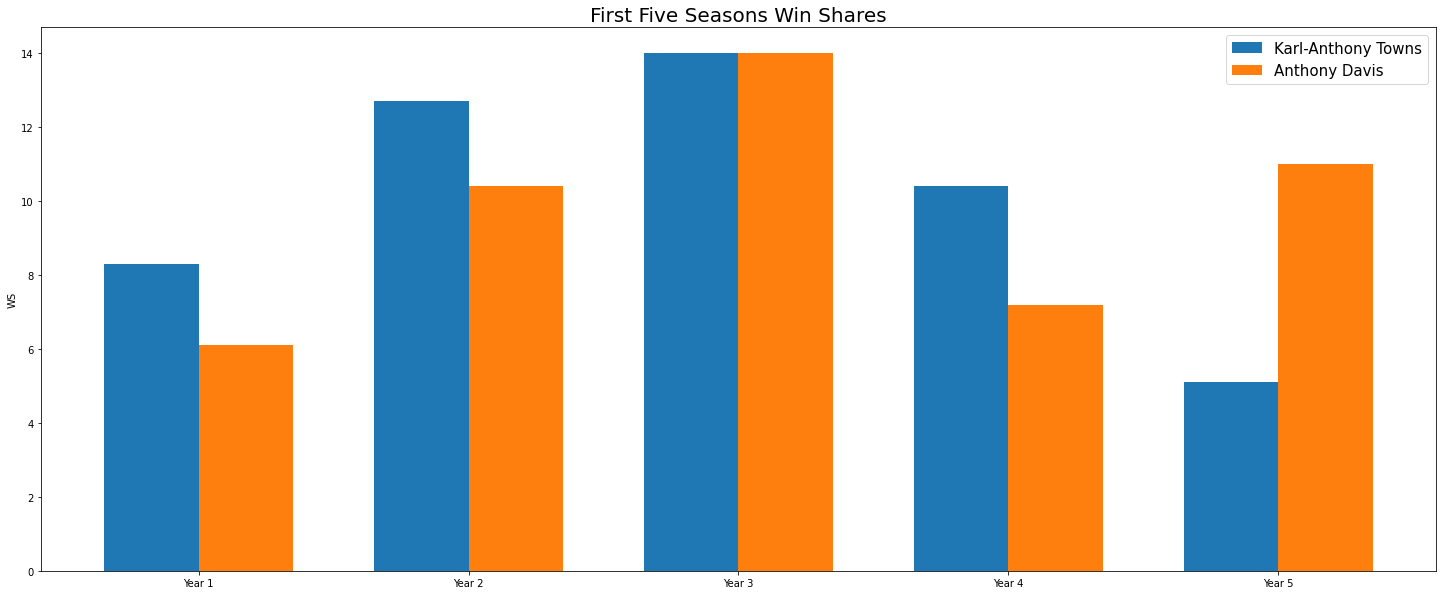

In [80]:
N = 5
kat_data = (towns_stats[2016]['win_shares'], towns_stats[2017]['win_shares'], towns_stats[2018]['win_shares'], towns_stats[2019]['win_shares'],  towns_stats[2020]['win_shares'])
ad_data = (davis_stats[2013]['win_shares'], davis_stats[2014]['win_shares'], davis_stats[2015]['win_shares'], davis_stats[2016]['win_shares'],  davis_stats[2017]['win_shares'])

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, kat_data, width, label='Karl-Anthony Towns')
plt.bar(ind + width, ad_data, width, label='Anthony Davis')

plt.ylabel("WS")
plt.title('First Five Seasons Win Shares', fontsize=20)

plt.xticks(ind + width / 2, ('Year 1', 'Year 2', 'Year 3', 'Year 4','Year 5'))
plt.legend(loc='best', prop={'size': 15})